# <진행할 선형회귀 문제>
## 1. 당뇨병 수치 예측하기
## 2. 자전거 대여량 예측하기  

특이점: 
모델 설계, 손실함수 정의, 기울기 계산을 직접 수행할 것임  

-------

# 1. 당뇨병 수치 예측하기
## (1) 데이터 가져오기

In [115]:
#필요한 라이브러리 가져오기
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [116]:
# 데이터 호출하기
diabetes = load_diabetes()

In [117]:
#diabetes관련 method 확인하기
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [118]:
# feature와 label 변수에 저장하기
df_X = diabetes.data
df_y = diabetes.target

In [119]:
#feature와 label 크기 확인하기
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [120]:
#feature의 이름 확인하기
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [121]:
df = pd.DataFrame(data = df_X, columns = diabetes.feature_names)
df["label"] = diabetes.target
df
# 모든 특성이 -0.2 ~ 0.2 사이에 분포하도록 조정되어 있어서 이런 표를 보임

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [122]:
#diabetes의 기술통계 확인하기
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## (2) 모델에 입력할 데이터 X 준비하기

In [123]:
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values

## (3) 모델에 입력할 데이터 y 준비하기

In [124]:
y = df['label'].values

## (4) train 데이터와 test 데이터로 분리하기

In [125]:
#훈련데이터와 평가데이터를 2:8로 나누기
X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [126]:
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  353 , X_test 개수:  89


In [127]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#훈련데이터 353개, 평가데이터89개, w 10개, b 1개

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

In [128]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
print("슝=3")

슝=3


In [129]:
print(W)
print(b)

[0.45235546 0.43681134 0.09502852 0.07914826 0.08307486 0.49238873
 0.76191064 0.4263272  0.44063871 0.70492607]
0.07888236104253454


In [130]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


## (6) 손실함수 loss 정의하기

In [131]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [132]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


## (7) 기울기를 구하는 gradient 함수 구현하기

In [133]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [134]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37158145 -0.31237014 -4.29262366 -3.23001878 -1.54672727 -1.26941168
  2.89087207 -3.14835333 -4.14004391 -2.79582994]
db: -304.1092036037068


## (8) 하이퍼 파라미터인 학습률 설정하기

In [135]:
LEARNING_RATE = 0.1

## (9) 모델 학습하기

In [136]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3443.8308
Iteration 2000 : Loss 3094.2567
Iteration 3000 : Loss 2979.0928
Iteration 4000 : Loss 2933.7586
Iteration 5000 : Loss 2914.6960
Iteration 6000 : Loss 2906.1611
Iteration 7000 : Loss 2902.0654
Iteration 8000 : Loss 2899.9408
Iteration 9000 : Loss 2898.7376
Iteration 10000 : Loss 2897.9869


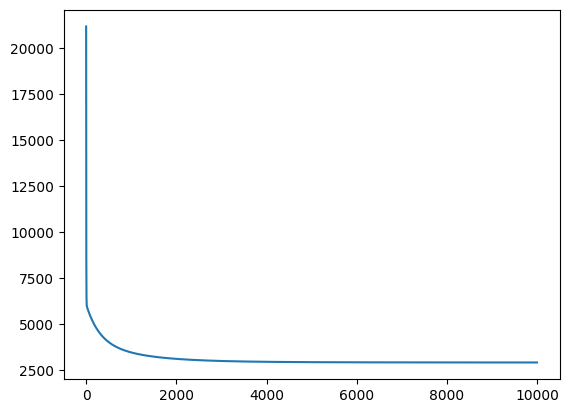

In [137]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [138]:
W, b

(array([  39.93957356, -236.71534985,  550.29322906,  340.33551573,
         -98.40573852, -126.88100467, -215.66490064,  149.01285136,
         411.17519238,   71.84754053]),
 151.3038021366424)

## (10) test 데이터에 대한 성능 확인하기

In [139]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2880.214034507182

## (11) 정답 데이터와 예측한 데이터 시각화하기

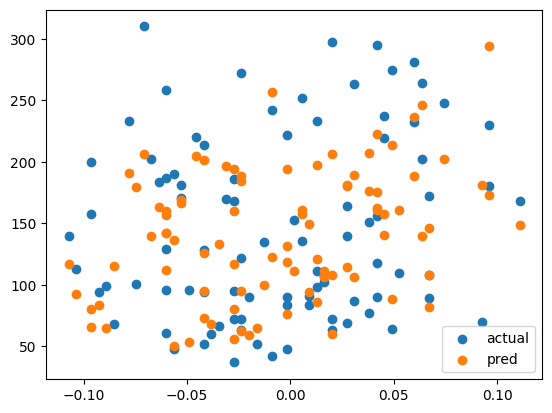

In [140]:
plt.scatter(X_test[:, 0], y_test, label = 'actual')
plt.scatter(X_test[:, 0], prediction, label = 'pred')
plt.legend()
plt.show()

## (12) 결론
 laerning rate 걊이 0.1>0.01>0.001>0.0001순으로 더 성능이 좋았다.   
또한 epoch 횟수가 10001>1001>101순으로 더 성능이 좋았다. (9)단계의 그림을 참고하여 보면 2000번부터 변화율이 거의 없으므로 2000번 반복이 가장 적절한 것으로 보인다. 

----------
# 2. 자전거 대여량 예측하기

## (1) 데이터 준비하기

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use('default')

In [19]:
train_data = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train = train_data.copy()
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [20]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [21]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['min'] = train.datetime.dt.minute
train['sec'] = train.datetime.dt.second

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [22]:
train['min']

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: min, Length: 10886, dtype: int64

In [23]:
train = train.drop([train.columns[17], train.columns[16]], axis = 1)

-> min값과 sec값은 모두 0으로 되어있기 때문제 제거해주었다.

<AxesSubplot:xlabel='hour', ylabel='count'>

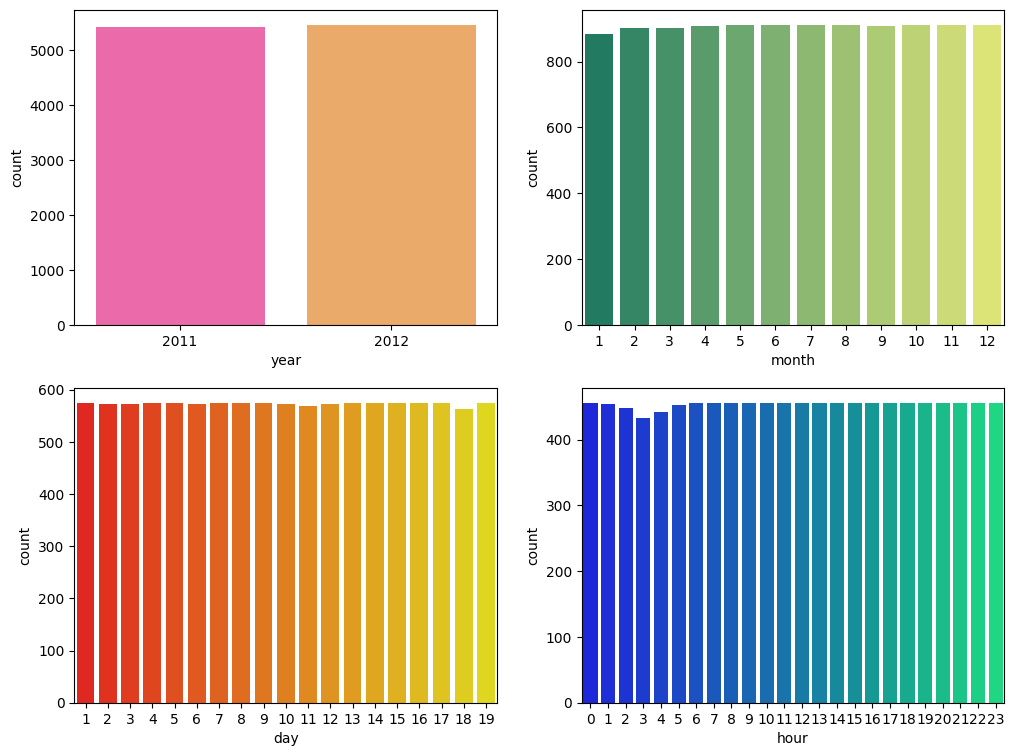

In [24]:
plt.subplots(figsize = (12, 9))

plt.subplot(221)
sns.countplot(x = 'year', palette = 'spring', data = train)

plt.subplot(222)
sns.countplot(x = 'month', palette = 'summer', data = train)

plt.subplot(223)
sns.countplot(x = 'day', palette = 'autumn', data = train)

plt.subplot(224)
sns.countplot(x = 'hour', palette = 'winter', data = train)

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [25]:
y = train['count']

In [44]:
cols = ['season', 'holiday', 'weather',  'temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X = train[cols]

In [45]:
#훈련데이터와 평가데이터를 2:8로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [46]:
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  8708 , X_test 개수:  2178


In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#훈련데이터 8708개, 평가데이터2178개, w 10개, b 1개

(8708, 10) (8708,)
(2178, 10) (2178,)


## (5) LinearRegression 모델 학습

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [49]:
pred = model.predict(X_test)
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", mean_squared_error(y_test, pred, squared=False))
print("MAE: ", mean_absolute_error(y_test, pred))
print("R2: ", r2_score(y_test, pred))

MSE:  19962.66630891719
RMSE:  141.28930005105548
MAE:  105.37819796379141
R2:  0.3951978338569998


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

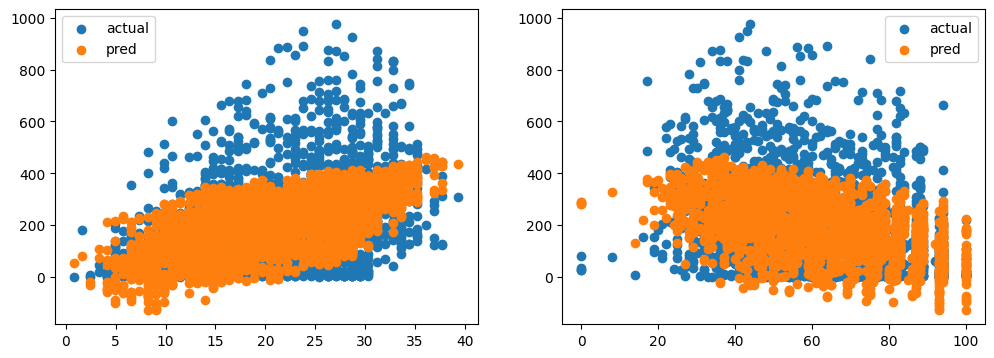

In [71]:
plt.subplots(figsize = (12, 9))

plt.subplot(221)
plt.scatter(X_test.iloc[:, 3], y_test, label = 'actual')
plt.scatter(X_test.iloc[:, 3], pred, label = 'pred')
plt.legend()

plt.subplot(222)
plt.scatter(X_test.iloc[:, 4], y_test, label = 'actual')
plt.scatter(X_test.iloc[:, 4], pred, label = 'pred')
plt.legend()

In [73]:
pred.max()

463.1750961240614

## (8) 결론

mse, rmse, mae로는 성능을 한눈에 확인하기 어려워서 R2결정계수를 보아하니 0.39라는 값이 나왔다. 그래프상으로는 정확도가 높아보였는데 결정계수값이 작아서 놀랐다. 그리고 예측값의 count 부분이 약 500이상 올라가지 않는 것을 보고 pred.max()를 실행해보았더니 약 463이 나왔다. 원인은 알 수 없으나 이 때문에 결정계수값이 작은 것으로 추측한다.

# 프로젝트 회고

## 배운점
1.  오류해결: 다양한 오류 방법을 통해서 문제가 발생하였을 때 해결하는 방법을 여러가지 알 수 있었다. 특히 오류 코드를 그대로 복사하면 stack사이트에서 다양한 방식으로 문제를 해결 할 수 있고, github나 여러 블로그를 통해 오류의 원인과 개념 이해까지 할 수 있었다. 예전엔 sklearn같은 전문 사이트나 영어로 된 사이트는 잘 안보거나 바로 한글로 번역해서 보았는데 이제는 번역없이도 찾아보는 게 슬슬 익숙해지고 있다.  
  
2. loss함수와 gradient함수를 정의하여 직접 파라미터를 조절해가며 정확도를 높혀가는 과정이 가장 흥미롭고 재미있었다. 이미 만들어진 최적의 모델을 사용하는 것이 편하긴 하지만 직접 모델의 성능을 높히는 경험을 통하여 더욱 모델에 대해서 이해할 수 있었다.  
  
3. mse말고도 다양한 평가 지표가 있다는 것을 배우고 난 후 모델 평가를 더 자세히 할 수 있어서 좋았다. 만약 결정계수에 대해서 알지 못했다면 'mse값이 약 19962로 나왔다'라는 사실밖에 알지 못했을 것이다.  
  

## 아쉬운점
두번째 프로젝트인 자전거 대여량 예측하기에서도 첫번째 프로젝트처럼 직접 파라미터를 바꿔가며 성능을 높히고 싶었는데 첫번째 프로젝트와 다르게 계속 오류가 떠서 하지 못하였다. 좀더 내가 원하는 코드를 실행할 수 있도록 공부가 필요할 것 같다. 이것과 더불어서 pred값이 500을 넘지 않는 현상의 원인과 성능이 안좋은 이유를 찾아보아야겠다.  

## 종합후기
GDM을 통해 모델 성능을 높히는 작업과 여러 평가 지표를 사용하여 모델 평가를 다양하게 하는 작업이 가장 유익했고 다양한 plot색깔변환 종류를 알 게 되어서 재밌었다. 모델 성능 평가와 성능을 높히는 방법에 대해 더 공부해야겠다.   

### 오류해결1:  
1- (9)단계:  _'ValueError: operands could not be broadcast together with shapes (12,) (10,) (12,)'_  
1. 해결시도1: (9)단계에서 W -= LEARNING_RATE * dW.T로 수정  
2. 해결시도2: (7)단계에서 dW = 1/N * 2 * X.T.dot(y_pred - y).reshape((-1,1))로 수정  
3. 해결시도3: (5)단계에서 W값을 W = np.random.rand(12)이 아닌 W = np.random.rand(10)으로 수정  
결론: W와 dW의 행렬 차원이 맞지 않아서 생긴 오류였다. 오류해결!!!

### 오류해결2: 
2 - (3)단계: _IndexError: GridSpec slice would result in no space allocated for subplot_  
해결시도: train['min']과 train['sec']를 확인해보니 모두 0인것을 확인함  
결론: train.drop([train.columns[17], train.columns[16]], axis = 1) 수행 오류해결!!   

### 오류해결3: 
2 - (3)단계에서 이 오류를 통해 여러가지 색변환 방법이 있다는 것을 알게 되었고 내 맘대로 이쁘게 디자인해보았다.   
ValueError: 'Set4' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'  
### 오류해결4: 
2-(7)단계: _TypeError: '(slice(None, None, None), 3)' is an invalid key_  
검색을 통해 오류해결: X_test[:, 3]를 X_test.iloc[:, 3]로 바꾸었다.  
이를 통하여 판다스 데이터를 슬라이싱하려면 iloc함수가 필요하거나 넘파이배열로 바꿔야한다는 것을 배울 수 있었다. 1번프로젝트는 넘파이배열로 만들어졌기 때문에 이런 오류가 없었지만 2번 프로젝트는 아니기 때문에 이런 오류가 있었다.

# Reference
1. 당뇨병 수치 데이터  
https://lms.aiffel.io/course/443/node/649/step/4331  
2. 차원 맞추기 오류 해결   
https://stackoverflow.com/questions/24560298/python-numpy-valueerror-operands-could-not-be-broadcast-together-with-shapes  
3. value, values 차이  
https://hsd0937.tistory.com/20  
4. datetime 자료형 변환과 연, 월, 일, 시, 분, 초 값 추출  
https://www.w3resource.com/python-exercises/pandas/datetime/pandas-datetime-exercise-8.php   
5. 열삭제 참고   
https://blog.naver.com/rising_n_falling/221631637822  
6. sns.subplot 참고  
https://steadiness-193.tistory.com/192  
7. sns.subplot 참고2  
https://wikidocs.net/13582  
8. 황금비  
https://namu.wiki/w/%ED%99%A9%EA%B8%88%EB%B9%84  
9. 다양한 모델 평가 메트릭스  
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
10. 인덱스 문제 오류 해결  
https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key   